In [9]:
# Read the Titanic dataset
titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Group the dataset by 'sex' column and count the number of occurrences
sex_counts = titanic['sex'].value_counts()

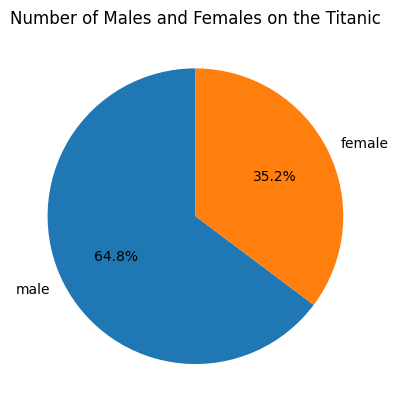

In [8]:
# Create a pie chart
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
#Title 
plt.title ('Number of Males and Females on the Titanic')
#Display the pie chart
plt.show()

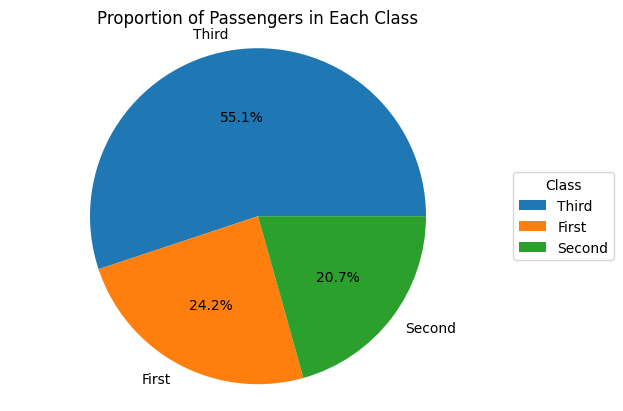

In [16]:
#QUESTION 2
#Create a pie chart which shows the proportion of passengers in each class(1, 2, 3)

# Calculate the proportion of each class
class_counts = titanic['class'].value_counts()
class_proportions = class_counts / class_counts.sum()

# Create a pie chart
plt.pie(class_proportions, labels=class_proportions.index, autopct='%1.1f%%')

# Set aspect ratio to be equal so that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Proportion of Passengers in Each Class')

#Legend
plt.legend(title="Class", loc="center left", bbox_to_anchor=(1,0.5))

# Display the pie chart
plt.show()

In [18]:
#QUESTION 3
#Explain the relationship between age and fare using a visualisation


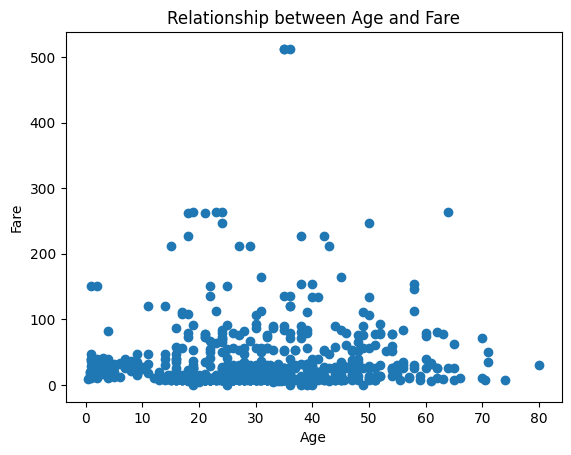

In [19]:
# Select the 'age' and 'fare' columns
age_fare = titanic[['age', 'fare']]

# Drop rows with missing values
age_fare = age_fare.dropna()

# Convert the 'age' and 'fare' columns to numpy arrays
age = np.array(age_fare['age'])
fare = np.array(age_fare['fare'])

# Create a scatter plot
plt.scatter(age, fare)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Relationship between Age and Fare')

# Display the plot
plt.show()

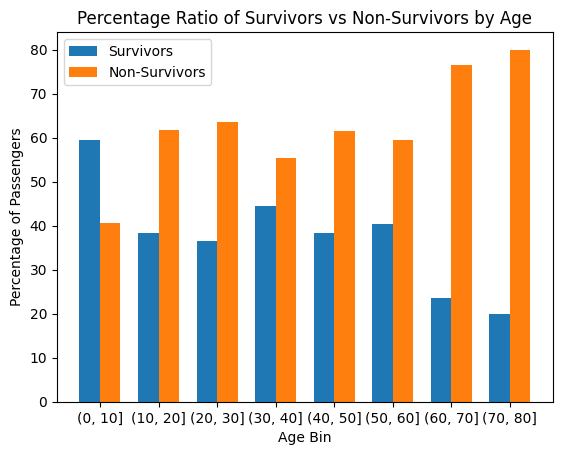

In [45]:
#QUESTION 4
#Survival ratio by age
# Create age bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# Categorize passengers into age bins
titanic['AgeBin'] = pd.cut(titanic['age'], bins)

# Calculate the total number of passengers in each age bin
total_passengers_by_age_bin = titanic['AgeBin'].value_counts()

# Calculate the number of survivors and non-survivors in each age bin
survivors_by_age_bin = titanic[titanic['survived'] == 1]['AgeBin'].value_counts()
non_survivors_by_age_bin = titanic[titanic['survived'] == 0]['AgeBin'].value_counts()

# Calculate the percentage of survivors and non-survivors in each age bin
percent_survivors_by_age_bin = (survivors_by_age_bin / total_passengers_by_age_bin) * 100
percent_non_survivors_by_age_bin = (non_survivors_by_age_bin / total_passengers_by_age_bin) * 100

# Create a DataFrame with the percentages
data = pd.DataFrame({'Survivors': percent_survivors_by_age_bin, 'Non-Survivors': percent_non_survivors_by_age_bin})

# Create an array of indices for the age bins
indices = np.arange(len(data))

# Set the width of each bar
bar_width = 0.35

# Plot the bar chart with side-by-side bars
fig, ax = plt.subplots()
bar1 = ax.bar(indices, data['Survivors'], bar_width, label='Survivors')
bar2 = ax.bar(indices + bar_width, data['Non-Survivors'], bar_width, label='Non-Survivors')

# Add labels, title, and legend
ax.set_xlabel('Age Bin')
ax.set_ylabel('Percentage of Passengers')
ax.set_title('Percentage Ratio of Survivors vs Non-Survivors by Age')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(data.index)
ax.legend()

# Display the bar chart
plt.show()

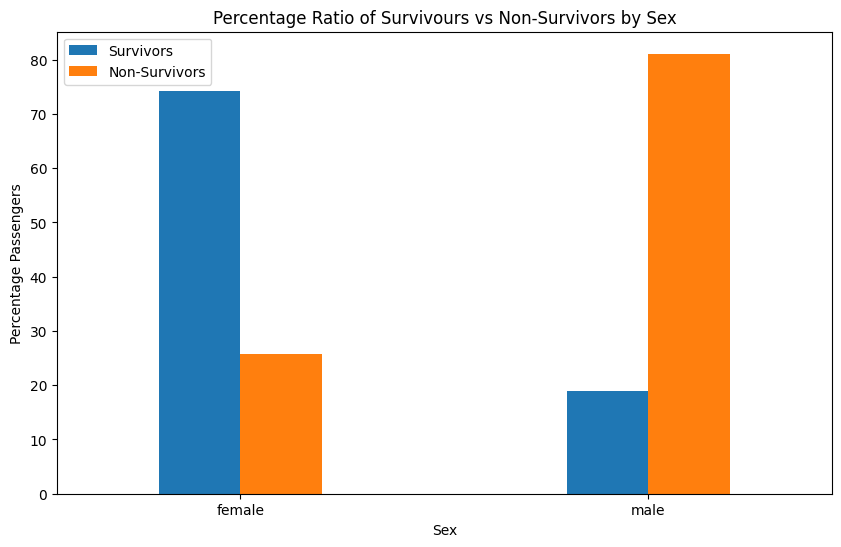

In [43]:
#Survival ratio by sex

# Calculate the percentage of survivors and non-survivors by sex
total_by_sex = titanic['sex'].value_counts()
survivors_by_sex = titanic[titanic['survived'] == 1]['sex'].value_counts()
non_survivors_by_sex = titanic[titanic['survived'] == 0]['sex'].value_counts()

percent_survivors_by_sex = survivors_by_sex / total_by_sex * 100
percent_non_survivors_by_sex = non_survivors_by_sex / total_by_sex * 100

# Create a DataFrame with the percentages
data = pd.DataFrame({'Survivors': percent_survivors_by_sex, 'Non-Survivors': percent_non_survivors_by_sex})

# Plot the side-by-side bar chart
data.plot(kind='bar', stacked=False, figsize=(10, 6), width=0.4)
plt.xlabel('Sex')
plt.ylabel('Percentage Passengers')
plt.title('Percentage Ratio of Survivours vs Non-Survivors by Sex')
plt.xticks(rotation=0)
plt.legend()
plt.show()

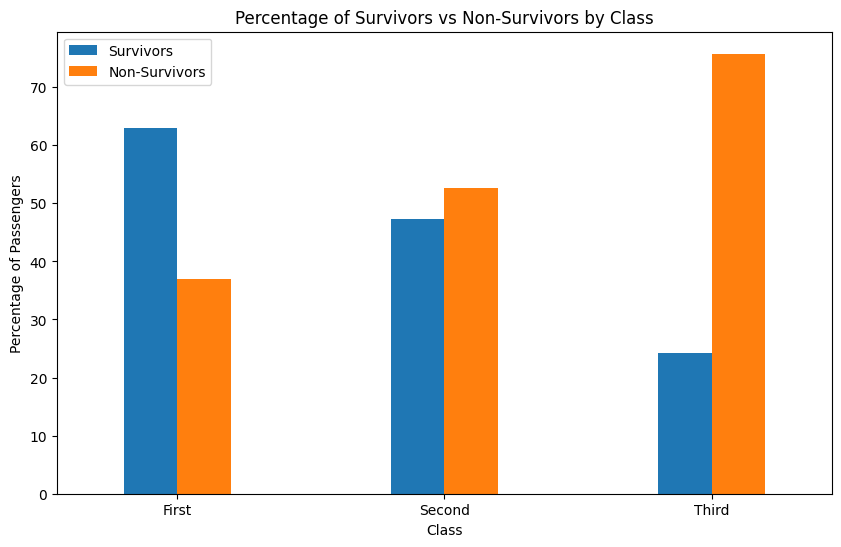

In [41]:
#Survival ratio by class

# Calculate the total number of passengers in each class
total_passengers_by_class = titanic['class'].value_counts()

# Calculate the number of survivors and non-survivors in each class
survivors_by_class = titanic[titanic['survived'] == 1]['class'].value_counts()
non_survivors_by_class = titanic[titanic['survived'] == 0]['class'].value_counts()

# Calculate the percentage of survivors and non-survivors in each class
percent_survivors_by_class = (survivors_by_class / total_passengers_by_class) * 100
percent_non_survivors_by_class = (non_survivors_by_class / total_passengers_by_class) * 100

# Create a DataFrame with the percentages
data = pd.DataFrame({'Survivors': percent_survivors_by_class, 'Non-Survivors': percent_non_survivors_by_class})

# Plot the side-by-side bar chart
data.plot(kind='bar', stacked=False, figsize=(10, 6), width=0.4)
plt.xlabel('Class')
plt.ylabel('Percentage of Passengers')
plt.title('Percentage of Survivors vs Non-Survivors by Class')
plt.xticks(rotation=0)
plt.legend()
plt.show()